# Simple cross correlation in total field anomaly maps

**This notebook exemplifies the difference between the true and approximated total field anomaly, when applied the simple cross correlation in transforms magnetic maps.**

In [1]:
# Importing all usefull libraries
import numpy as np
import gravmag as gmc
import datafiltering as df
import matplotlib.pyplot as plt

In [2]:
# Positions and number of points
npts = 200
x = np.linspace(-1000, 1000, npts)
y = np.copy(x)
z = -20.
# Computes the mesh of all points
X, Y = np.meshgrid(x, y)

In [3]:
# Simple model
sphere = [0., 0., 500., 200., 1.75] # meters + A/m2
# Inclination and declination
field = [50., 18.] # regional field
direc = [29., 22.] # source

In [4]:
# Calculating the total field anomaly
true_tf = gmc.sphere_tf(X, Y, z, sphere, direc, field, 23500.)
appx_tf = gmc.sphere_tfa(X, Y, z, sphere, direc, field)

In [5]:
# Showing some statistical analysis
print 'For true total field anomaly:'
_ = df.statistical(true_tf, 'nT')
print 'For approximated total field:' 
_ = df.statistical(appx_tf, 'nT')

For true total field anomaly:
Minimum:    -26.2919 nT
Maximum:    43.9740 nT
Mean value: 0.5545 nT
Variation:  70.2658 nT
For approximated total field:
Minimum:    -26.2967 nT
Maximum:    43.9583 nT
Mean value: 0.5506 nT
Variation:  70.2550 nT


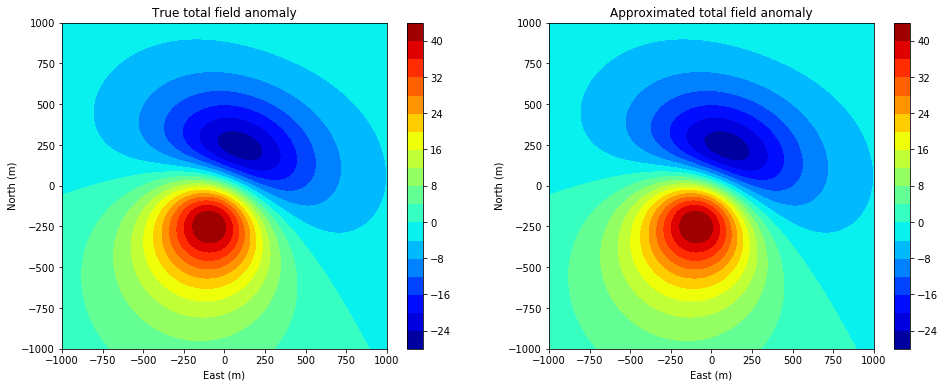

In [6]:
# Plotting the first result
plt.close('all')
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.contourf(Y, X, true_tf, 20, cmap = plt.cm.jet)
plt.title('True total field anomaly')
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(Y, X, appx_tf, 20, cmap = plt.cm.jet)
plt.title('Approximated total field anomaly')
plt.xlabel('East (m)')
plt.ylabel('North (m)')
plt.colorbar()

plt.show()

## 1 - Cross correlation using RTP and (i) horizontal gradient (ii) total gradient, (iii) tilt angle and (iv) pseudogravity with *True total field anomaly*

In [11]:
# Create inclination and declination values
inc = np.arange(10., 70.)
dec = np.arange(-50., 50.)

ni, nd = inc.size, dec.size
# Create the grid
Dec, Inc = np.meshgrid(dec, inc)

In [12]:
# Create the zero arrays to allocate the result
res1 = np.zeros([ni, nd])
res2 = np.zeros([ni, nd])
res3 = np.zeros([ni, nd])
res4 = np.zeros([ni, nd])

In [13]:
# Computing all result
for j in range(nd):
    for i in range(ni):
        RTP = df.reduction(x, y, true_tf, field, (inc[i], dec[j]), (90., 0.), (90., 0.))
        HGA = df.horzgrad(x, y, RTP)
        TGA = df.totalgrad(x, y, RTP)
        TILT = df.tilt(x, y, RTP)
        PGA = df.pseudograv(x, y, RTP, field, (inc[i], dec[j]), 2300., 2.3)        
        # Cross-correlation between reduction to pole and horizontal gradient
        res1[i,j] = df.cccoef(RTP, HGA)
        # Cross-correlation between reduction to pole and total gradient
        res2[i,j] = df.cccoef(RTP, TGA)
        # Cross-correlation between reduction to pole and tilt angle
        res3[i,j] = df.cccoef(RTP, TILT)
        # Cross-correlation between reduction to pole and pseudogravity
        res4[i,j] = df.cccoef(RTP, PGA)

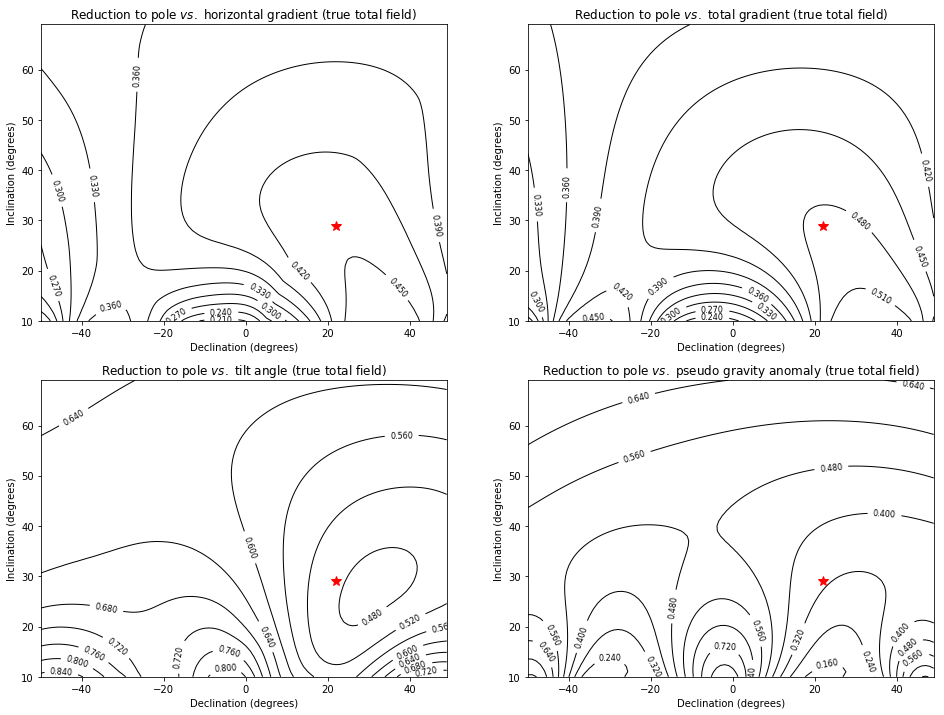

In [21]:
# Result
plt.close('all')
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plot1 = plt.contour(Dec, Inc, res1, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.plot(direc[1], direc[0], 'r*', markersize = 10)
plt.clabel(plot1, fontsize=8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Reduction to pole $vs.$ horizontal gradient (true total field)')
plt.xlabel('Declination (degrees)')
plt.ylabel('Inclination (degrees)')

plt.subplot(2, 2, 2)
plot1 = plt.contour(Dec, Inc, res2, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.plot(direc[1], direc[0], 'r*', markersize = 10)
plt.clabel(plot1, fontsize=8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Reduction to pole $vs.$ total gradient (true total field)')
plt.xlabel('Declination (degrees)')
plt.ylabel('Inclination (degrees)')

plt.subplot(2, 2, 3)
plot1 = plt.contour(Dec, Inc, res3, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.plot(direc[1], direc[0], 'r*', markersize = 10)
plt.clabel(plot1, fontsize=8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Reduction to pole $vs.$ tilt angle (true total field)')
plt.xlabel('Declination (degrees)')
plt.ylabel('Inclination (degrees)')

plt.subplot(2, 2, 4)
plot1 = plt.contour(Dec, Inc, res4, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.plot(direc[1], direc[0], 'r*', markersize = 10)
plt.clabel(plot1, fontsize=8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Reduction to pole $vs.$ pseudo gravity anomaly (true total field)')
plt.xlabel('Declination (degrees)')
plt.ylabel('Inclination (degrees)')

plt.show()

## 2 - Cross correlation using RTP and (i) horizontal gradient (ii) total gradient, (iii) tilt angle and (iv) pseudogravity with *Approximated total field anomaly*

In [22]:
# Create the zero arrays to allocate the result
res01 = np.zeros([ni, nd])
res02 = np.zeros([ni, nd])
res03 = np.zeros([ni, nd])
res04 = np.zeros([ni, nd])

In [23]:
# Computing all result
for j in range(nd):
    for i in range(ni):
        RTP = df.reduction(x, y, appx_tf, field, (inc[i], dec[j]), (90., 0.), (90., 0.))
        HGA = df.horzgrad(x, y, RTP)
        TGA = df.totalgrad(x, y, RTP)
        TILT = df.tilt(x, y, RTP)
        PGA = df.pseudograv(x, y, RTP, field, (inc[i], dec[j]), 2300., 2.3)        
        # Cross-correlation between reduction to pole and horizontal gradient
        res01[i,j] = df.cccoef(RTP, HGA)
        # Cross-correlation between reduction to pole and total gradient
        res02[i,j] = df.cccoef(RTP, TGA)
        # Cross-correlation between reduction to pole and tilt angle
        res03[i,j] = df.cccoef(RTP, TILT)
        # Cross-correlation between reduction to pole and pseudogravity
        res04[i,j] = df.cccoef(RTP, PGA)

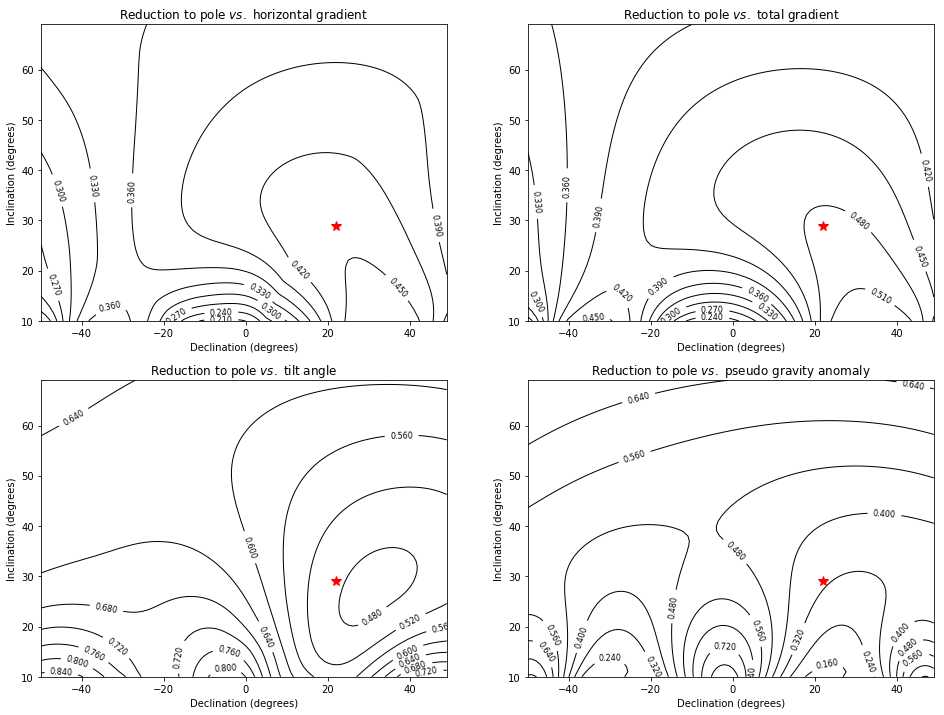

In [24]:
# Result
plt.close('all')
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plot1 = plt.contour(Dec, Inc, res01, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.plot(direc[1], direc[0], 'r*', markersize = 10)
plt.clabel(plot1, fontsize=8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Reduction to pole $vs.$ horizontal gradient')
plt.xlabel('Declination (degrees)')
plt.ylabel('Inclination (degrees)')

plt.subplot(2, 2, 2)
plot1 = plt.contour(Dec, Inc, res02, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.plot(direc[1], direc[0], 'r*', markersize = 10)
plt.clabel(plot1, fontsize=8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Reduction to pole $vs.$ total gradient')
plt.xlabel('Declination (degrees)')
plt.ylabel('Inclination (degrees)')

plt.subplot(2, 2, 3)
plot1 = plt.contour(Dec, Inc, res03, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.plot(direc[1], direc[0], 'r*', markersize = 10)
plt.clabel(plot1, fontsize=8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Reduction to pole $vs.$ tilt angle')
plt.xlabel('Declination (degrees)')
plt.ylabel('Inclination (degrees)')

plt.subplot(2, 2, 4)
plot1 = plt.contour(Dec, Inc, res04, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.plot(direc[1], direc[0], 'r*', markersize = 10)
plt.clabel(plot1, fontsize=8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Reduction to pole $vs.$ pseudo gravity anomaly')
plt.xlabel('Declination (degrees)')
plt.ylabel('Inclination (degrees)')

plt.show()